# Entregable 1

**Autor**: Sergio Rodríguez Calvo

En primer lugar, vamos a importar las librerías que vamos a utilizar a lo largo del cuaderno. En este caso, se ha seleccionado `matplotlib` como librería para mostrar las imagenes dentro del propio cuadernos, evitando utilizar ventanas externas.

In [1]:
from IPython.display import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from collections import Counter

## Ejercicio 1. Modelos de color

El vídeo que hemos grabado (fichero `output.mp4`) utilizando el script `save.py`, tiene 7 segundos de duración y ha sido grabado a 25 frames por segundo. Por tanto, vamos a calcular el número total de frames.

In [2]:
time_length = 7.0
fps = 25.0
frames = fps * time_length
print('El número de frames es:', frames)

El número de frames es: 175.0


Vamos a seleccionar el frame 25 que es justo el segundo 1 del vídeo. Para ello, utilizamos el cálculo de los frames totales del vídeo anterior. Este valor, debe estar entre 0 y 1, de acuerdo con lo esperado por el método `set` del objeto `VideoCapture`, del que hablaremos posteriormente.

In [3]:
frame_seq = 25
frame_no = frame_seq / frames
print('El frame es:', frame_no)

El frame es: 0.14285714285714285


A continuación, vamos a abrir el fichero utilizando el objeto `VideoCapture` indicando la ruta y el nombre de fichero. Una vez realizado esto, vamos a elegir el frame que deseamos, utilizando `set`, el cual espera dos argumentos:
* El flag para indicar el índice de selección de frame, en este caso elegimos CV_CAP_PROP_POS_FRAMES cuyo valor es 1, que indica que seleccionamos el frame por posición.
* El frame específico dentro del rango 0-1, a partir del cálculo previo.

In [4]:
cap = cv.VideoCapture('output.mp4')
cap.set(1,frame_no)

True

Finalmente, obtenemos el frame original y lo mostramos utilizando matplotlib.

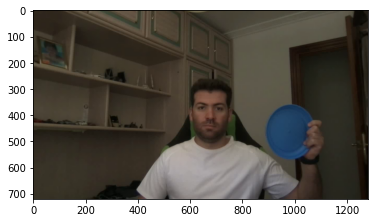

In [5]:
ret, frame = cap.read()

img = frame[:,:,::-1]
plt.imshow(img)

Un frame en OpenCV es un array de tres dimensiones, donde los dos primeros ejes hacen referencia a los pixeles por sus posiciones (x,y) sobre el plano de la imagen en 2D y, el tercer eje, hace referencia al canal de color. Por defecto, un frame es una imagen BGR (Blue, Green, Red). Para poder mostrar la imagen con `matplotlib` es necesario invertir el orden del tercer canal, para convertirlo así en RGB.

Una vez que tenemos seleccionado el frame, vamos a convertirlo a [HSV](https://es.wikipedia.org/wiki/Modelo_de_color_HSV) (Tono, Stauración, Valor).  Donde, el tono es el color propiamente dicho, el valor es el brillo y la saturación es cuánto está mezclado el color con la luz blanca.

In [6]:
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

En nuestro caso, el objeto que queremos seleccionar tiene color azul, por lo que vamos a definir un rango de azul dentro del modelo HSV y a crear la mascara para hacer el filtrado.

In [7]:
lower_blue = np.array([100,50,50])
upper_blue = np.array([120,255,255])

mask = cv.inRange(hsv, lower_blue, upper_blue)

Ya estamos listos para aplicar la máscara y mostrar el resultado.

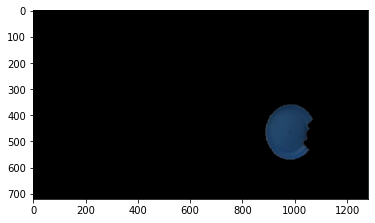

In [8]:
res = cv.bitwise_and(frame,frame, mask=mask)

res_img = res[:,:,::-1]
plt.imshow(res_img)

Vemos cómo se muestra sólo el objeto azul de la imagen sobre fondo blanco.

Podemos motrar también la máscara, donde podemos observar claramente el objeto.

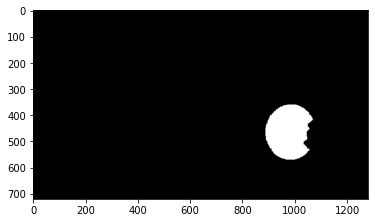

In [9]:
plt.imshow(mask, cmap='gray')

Hemos indicado que el mapa de colores a utilizar sea `gray`, para así mostrar la mascara en escala de grises (es decir, blanco el objeto seleccionado y negro para todo lo demas), ya que trabajando con `matplotlib` lo que tenemos es una gráfica en lugar de una imagen.

Respecto a la pregunta de por qué es mejor trabajar en HSV para realizar filtrado por color es porque, en este modelo, el color queda codificado principalmente en un canal, el canal H. En RGB, a diferencia de HSV, el color se codifica en tres canales, por lo que a la hora de filtrar, te puedes centrar en un solo canal (el H) haciendo que varie poco, sin importar mucho los otros dos canales.

## Ejercicio 2. Codificación de Huffman

En primer lugar, vamos a generar la matriz 8 x 8 con números aleatorios entre 0 y 9.

In [10]:
img = np.random.randint(10, size=(8, 8))
img


array([[3, 0, 6, 1, 5, 3, 0, 3],
       [9, 7, 1, 9, 2, 6, 4, 5],
       [8, 1, 8, 7, 0, 6, 3, 2],
       [2, 5, 9, 5, 7, 6, 9, 6],
       [9, 1, 6, 7, 5, 4, 8, 5],
       [0, 2, 9, 0, 4, 3, 3, 0],
       [9, 0, 4, 9, 2, 1, 5, 7],
       [0, 9, 2, 7, 9, 9, 3, 6]])

Por cuestiones de repetibilidad, ya que al ejecutar el cuadernos varias veces, vamos a partir de una matriz aleatoria diferente, vamos a fijar una a partir de una de las ejecuciones del cuaderno. Así, la codificación de Huffman se puede hacer "a mano" y ser añadida en el cuaderno para que tenga validez.

In [11]:
img = np.array([[9, 2, 1, 8, 2, 7, 8, 3],
       [3, 5, 3, 1, 8, 3, 4, 5],
       [9, 4, 5, 6, 2, 0, 0, 1],
       [3, 4, 9, 6, 1, 4, 3, 1],
       [3, 0, 0, 4, 5, 7, 1, 3],
       [8, 1, 7, 3, 3, 9, 9, 6],
       [0, 6, 7, 2, 8, 2, 6, 4],
       [3, 1, 8, 0, 3, 2, 2, 1]])
img

array([[9, 2, 1, 8, 2, 7, 8, 3],
       [3, 5, 3, 1, 8, 3, 4, 5],
       [9, 4, 5, 6, 2, 0, 0, 1],
       [3, 4, 9, 6, 1, 4, 3, 1],
       [3, 0, 0, 4, 5, 7, 1, 3],
       [8, 1, 7, 3, 3, 9, 9, 6],
       [0, 6, 7, 2, 8, 2, 6, 4],
       [3, 1, 8, 0, 3, 2, 2, 1]])

Vamos a sacar una copia de la matriz y vamos a invertir el orden de las filas impares, para generar el _zig-zag_.

In [12]:
zz = img.copy()
zz[1::2, :] = zz[1::2, ::-1]
zz

array([[9, 2, 1, 8, 2, 7, 8, 3],
       [5, 4, 3, 8, 1, 3, 5, 3],
       [9, 4, 5, 6, 2, 0, 0, 1],
       [1, 3, 4, 1, 6, 9, 4, 3],
       [3, 0, 0, 4, 5, 7, 1, 3],
       [6, 9, 9, 3, 3, 7, 1, 8],
       [0, 6, 7, 2, 8, 2, 6, 4],
       [1, 2, 2, 3, 0, 8, 1, 3]])

Tras ello, vamos a convertir la matriz 8 x 8 en un vector de 64 componentes.

In [13]:
zz = zz.reshape((zz.shape[0]**2,))
zz

array([9, 2, 1, 8, 2, 7, 8, 3, 5, 4, 3, 8, 1, 3, 5, 3, 9, 4, 5, 6, 2, 0,
       0, 1, 1, 3, 4, 1, 6, 9, 4, 3, 3, 0, 0, 4, 5, 7, 1, 3, 6, 9, 9, 3,
       3, 7, 1, 8, 0, 6, 7, 2, 8, 2, 6, 4, 1, 2, 2, 3, 0, 8, 1, 3])

Creamos un vector de ceros con la misma forma que el vector anterior, es decir, 64 componentes a cero.

In [14]:
dimg = np.zeros(zz.shape, dtype=zz.dtype)
dimg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Calculamos las diferencias con el anterior, comenzando en 1 para mantener el primer valor igual que el original.

In [15]:
for i in range(1, zz.shape[0]):
    dimg[i] = zz[i]-zz[i-1]
dimg

array([ 0, -7, -1,  7, -6,  5,  1, -5,  2, -1, -1,  5, -7,  2,  2, -2,  6,
       -5,  1,  1, -4, -2,  0,  1,  0,  2,  1, -3,  5,  3, -5, -1,  0, -3,
        0,  4,  1,  2, -6,  2,  3,  3,  0, -6,  0,  4, -6,  7, -8,  6,  1,
       -5,  6, -6,  4, -2, -3,  1,  0,  1, -3,  8, -7,  2])

Una vez obtenemos el vector con las diferencias de cada componente respecto del anterior excepto el primer elemento de la primera fila, lo convertimos a una matriz 8 x 8 y volvemos a aplicar la misma operación de _zig-zag_.

In [16]:
dimg = dimg.reshape(img.shape)
dimg[1::2, :] = dimg[1::2, ::-1]
dimg

array([[ 0, -7, -1,  7, -6,  5,  1, -5],
       [-2,  2,  2, -7,  5, -1, -1,  2],
       [ 6, -5,  1,  1, -4, -2,  0,  1],
       [-1, -5,  3,  5, -3,  1,  2,  0],
       [ 0, -3,  0,  4,  1,  2, -6,  2],
       [ 7, -6,  4,  0, -6,  0,  3,  3],
       [-8,  6,  1, -5,  6, -6,  4, -2],
       [ 2, -7,  8, -3,  1,  0,  1, -3]])

Por tanto, ya hemos obtenido la imagen con las diferencias a partir de la imagen original.

Respecto de la pregunta _¿Cuál es el número de bits necesarios para almacenar cada píxel de img? ¿Y de Dimg?_ la respuesta es:
* Para el caso de la imagen original en cada pixel tenemos 10 símbolos, es decir, cada pixel puede tomar un valor entre 0 y 9, por lo que para codificar cada pixel necesitaremos 4 bits. Como `2^4` son 16, caben los 10 bits. Con 3 bits no tendríamos suficiente para cubrir todos los símbolos.  
* Para el caso de la imagen de diferencias tenemos 19 símbolos, que son los 10 símbolos de la imagen original más los negativos de los símbolos del 1 al 9. Por tanto, con 4 bits no es suficiente, por lo que necesitamos un bit adicional, en este caso, un quinto bit, siendo `2^5` 32 bits en total, por lo que caben todos los símbolos.

A continuación, vamos a realizar la codificación de Huffman. Para ello, vamos ayudarnos de una hoja de calculo que estará adjunta al cuadernos, así como, se mostrará una imagen del proceso. Pero antes, vamos a definir una función que nos calcule las probabilidades ordenadas para cada símbolo.

In [17]:
def get_probabilities(a):
    a = a.reshape((a.shape[0]**2,))
    total = a.shape[0]
    cnt = Counter(a)
    sorted_cnt = sorted(cnt.items(), key=lambda i: i[1], reverse=True)
    res = {}
    for symbol,count in sorted_cnt:
        res[symbol] = float(count) / total
    return res

Una vez definida la función, vamos a obtener las probabilidades para los símbolos de `img`.

In [18]:
p_img = get_probabilities(img)
print(p_img)

{3: 0.1875, 1: 0.140625, 2: 0.109375, 8: 0.09375, 4: 0.09375, 0: 0.09375, 9: 0.078125, 6: 0.078125, 7: 0.0625, 5: 0.0625}


A partir de las probabilidades anteriores, hacemos el cálculo según se ha visto en teoría para obtener el código de Huffman. Comenzando con la tabla para despúes generar el árbol.

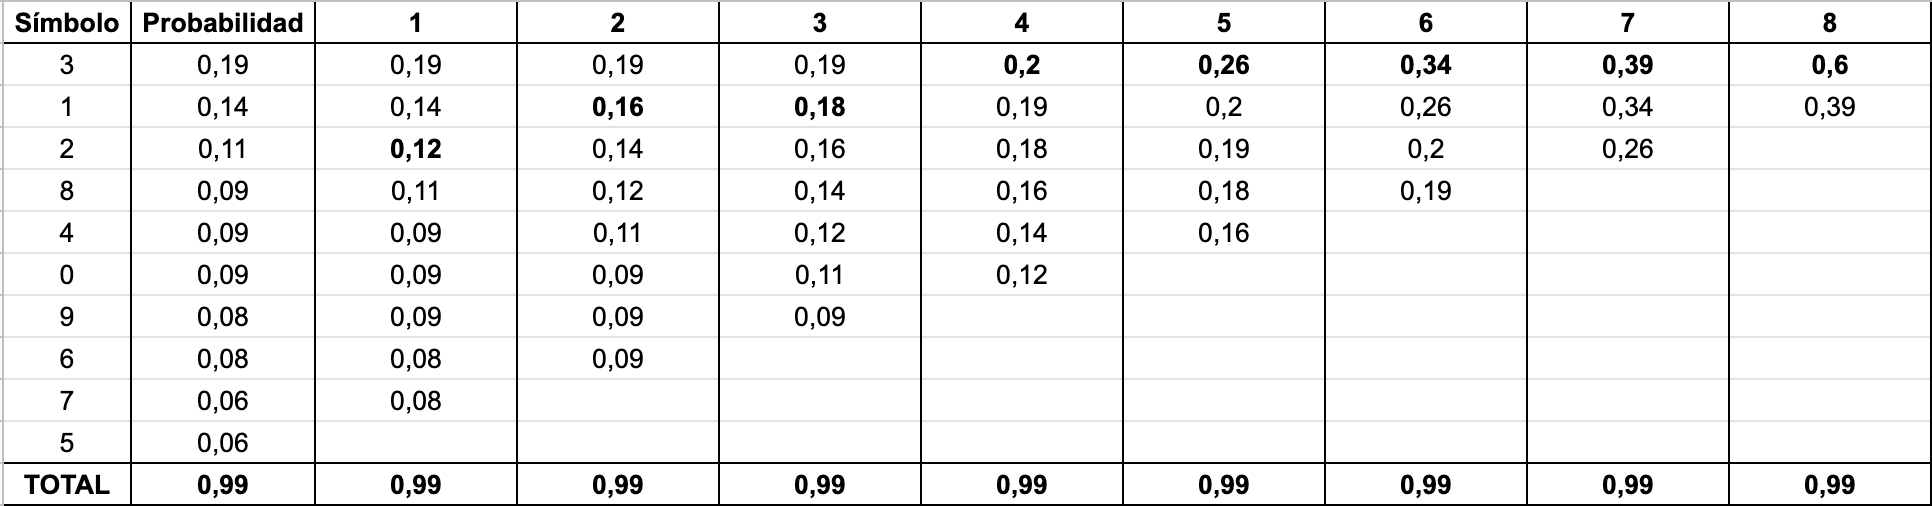

In [19]:
Image(filename='Tabla_Huffman.png') 

Hay que tener en cuenta que se ha realizado un redondeo para tener dos cifras decimales y facilitar los cálculos. Es por ello que, el total, es `0.99` en lugar de `1`, pero es un error mínimo, aunque lo vamos a propagar a lo largo de todo el proceso.

El árbol es el siguiente:

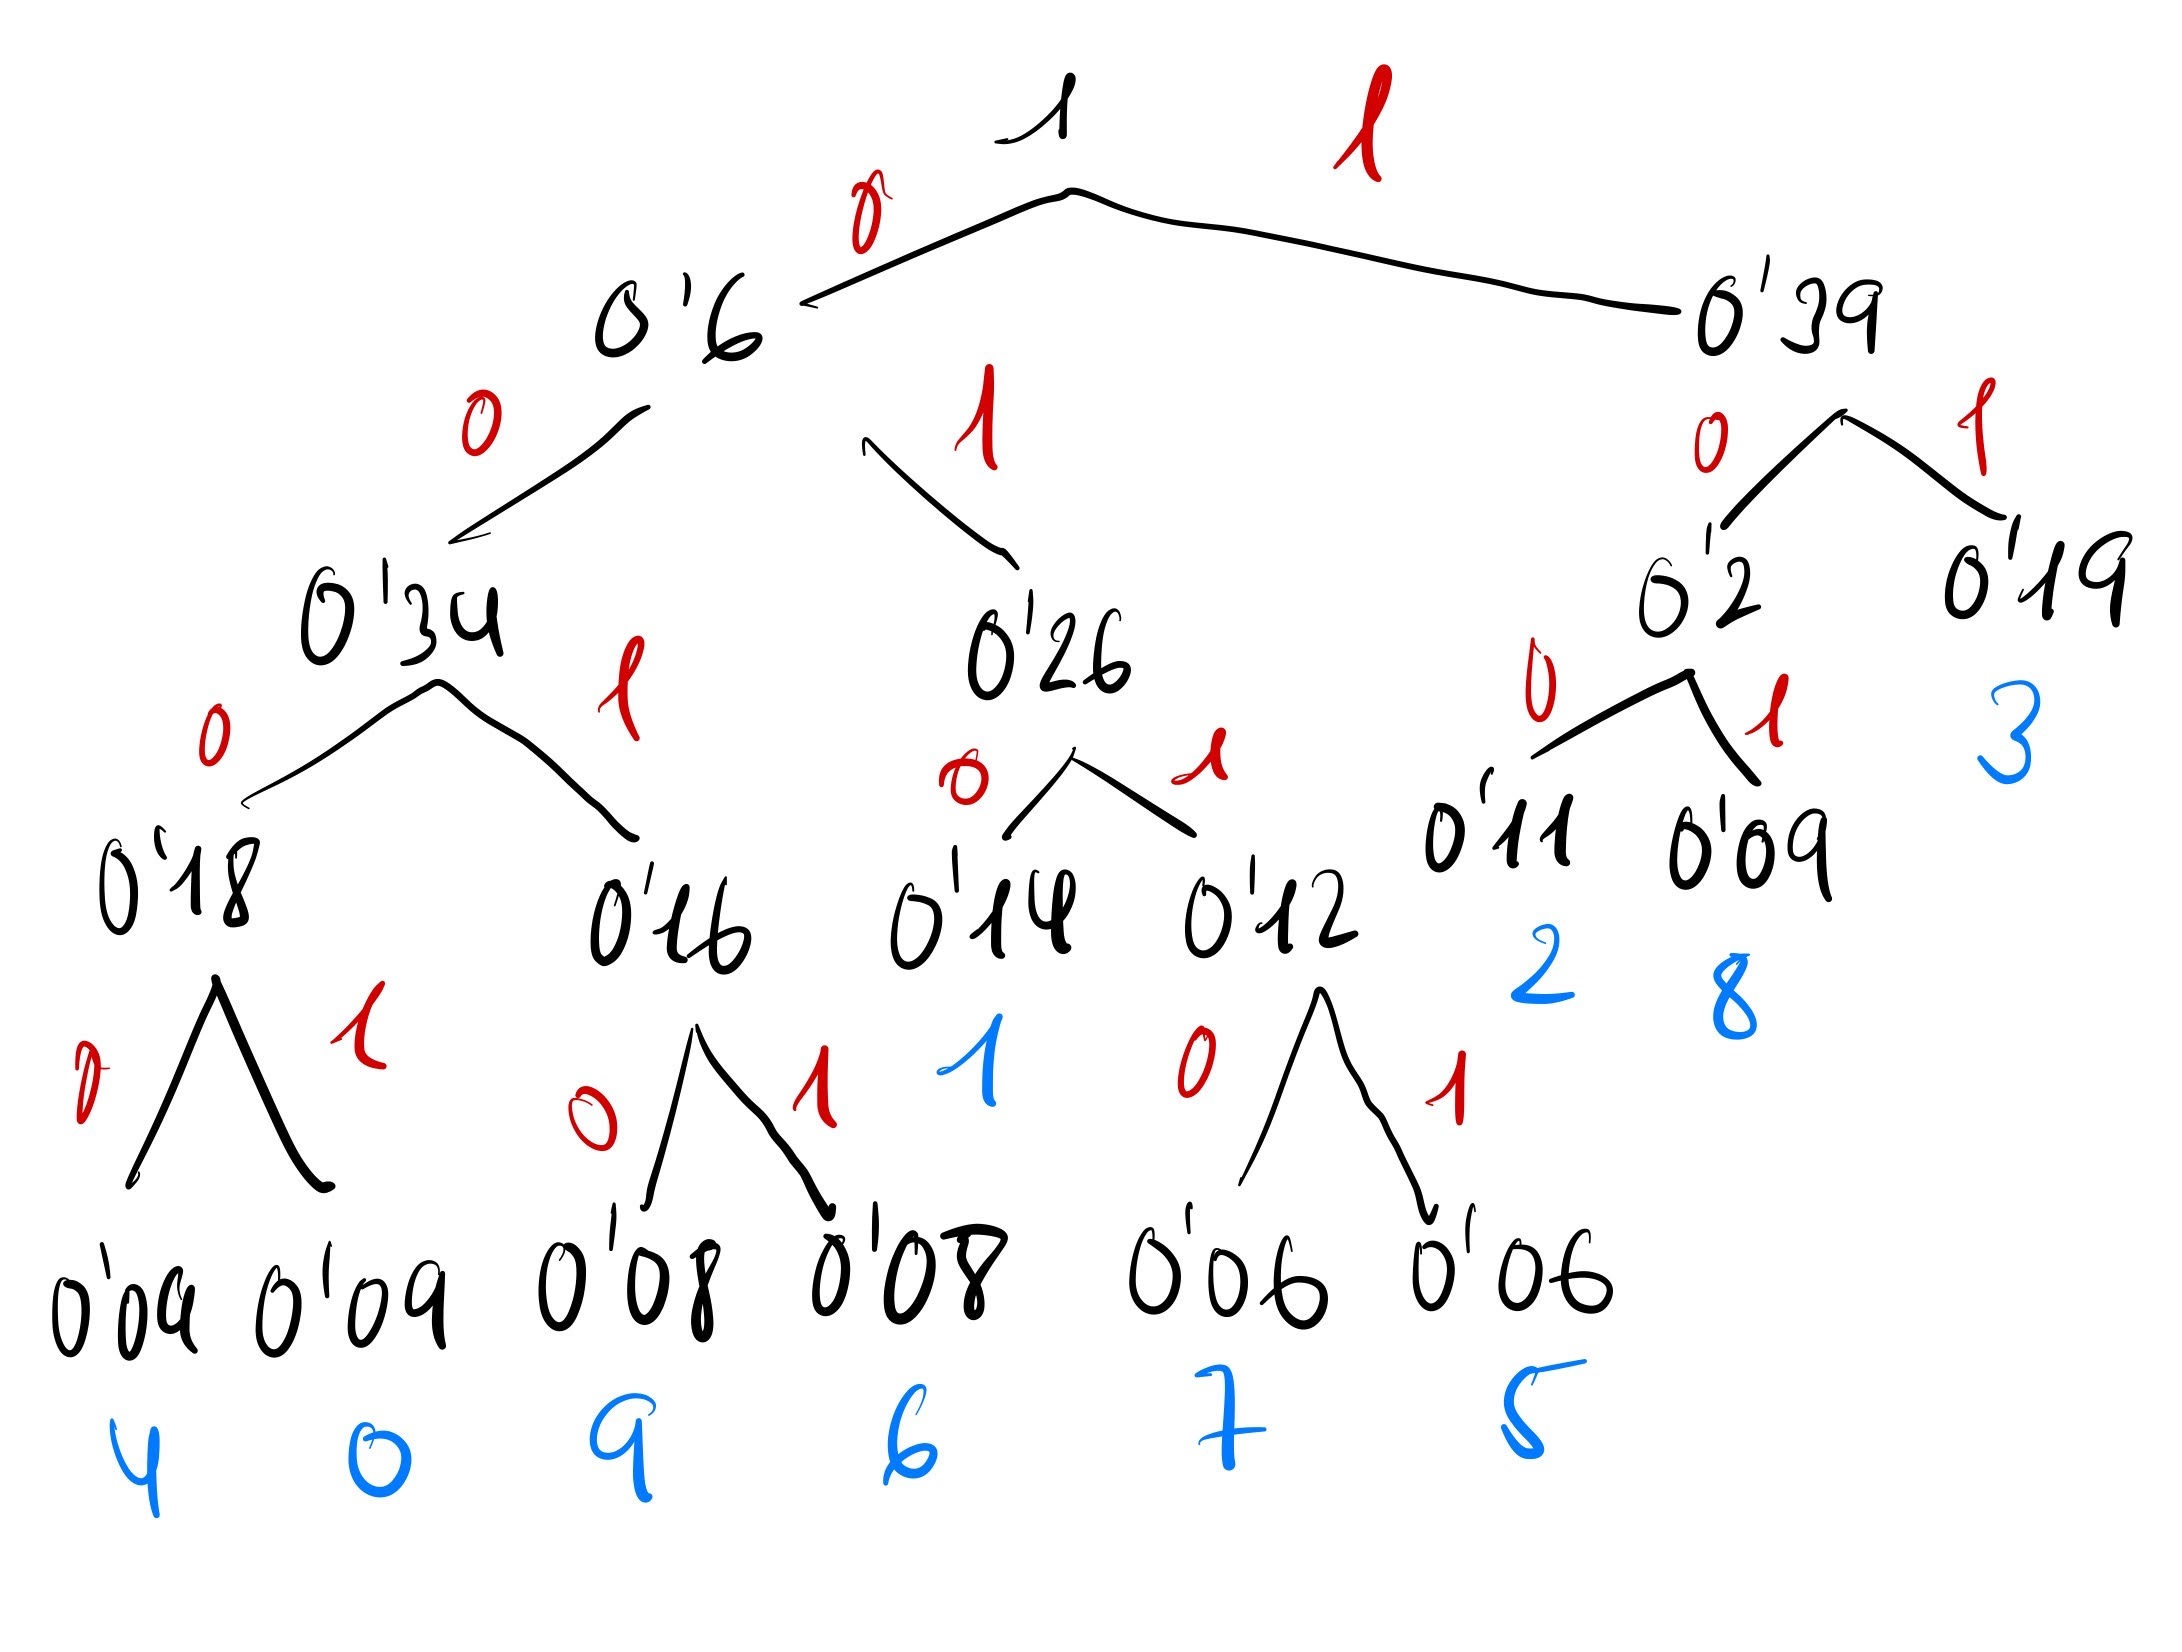

In [20]:
Image(filename='Arbol_Huffman.jpeg') 

Finalmente, tenemos los códigos de Huffman para cada símbolo (de longitud variable, inversamente proporcional a la probabilidad) en el caso de la imagen original `img`.

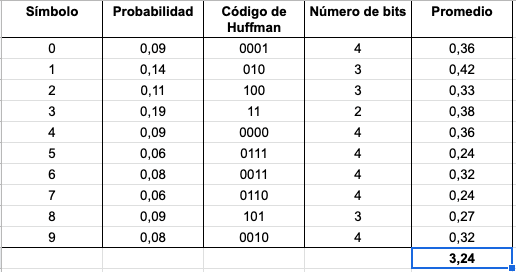

In [21]:
Image(filename='Resultado_Huffman.png')

Ahora, vamos a realizar el mismo proceso para la imagen `dimg`.

In [22]:
p_dimg = get_probabilities(dimg)
print(p_dimg)

{1: 0.140625, 0: 0.125, 2: 0.109375, -6: 0.078125, -1: 0.0625, -5: 0.0625, -3: 0.0625, -7: 0.046875, 5: 0.046875, -2: 0.046875, 6: 0.046875, 3: 0.046875, 4: 0.046875, 7: 0.03125, -4: 0.015625, -8: 0.015625, 8: 0.015625}


Del mismo modo que con la imagen original, la tabla de probabilidades es la siguiente:

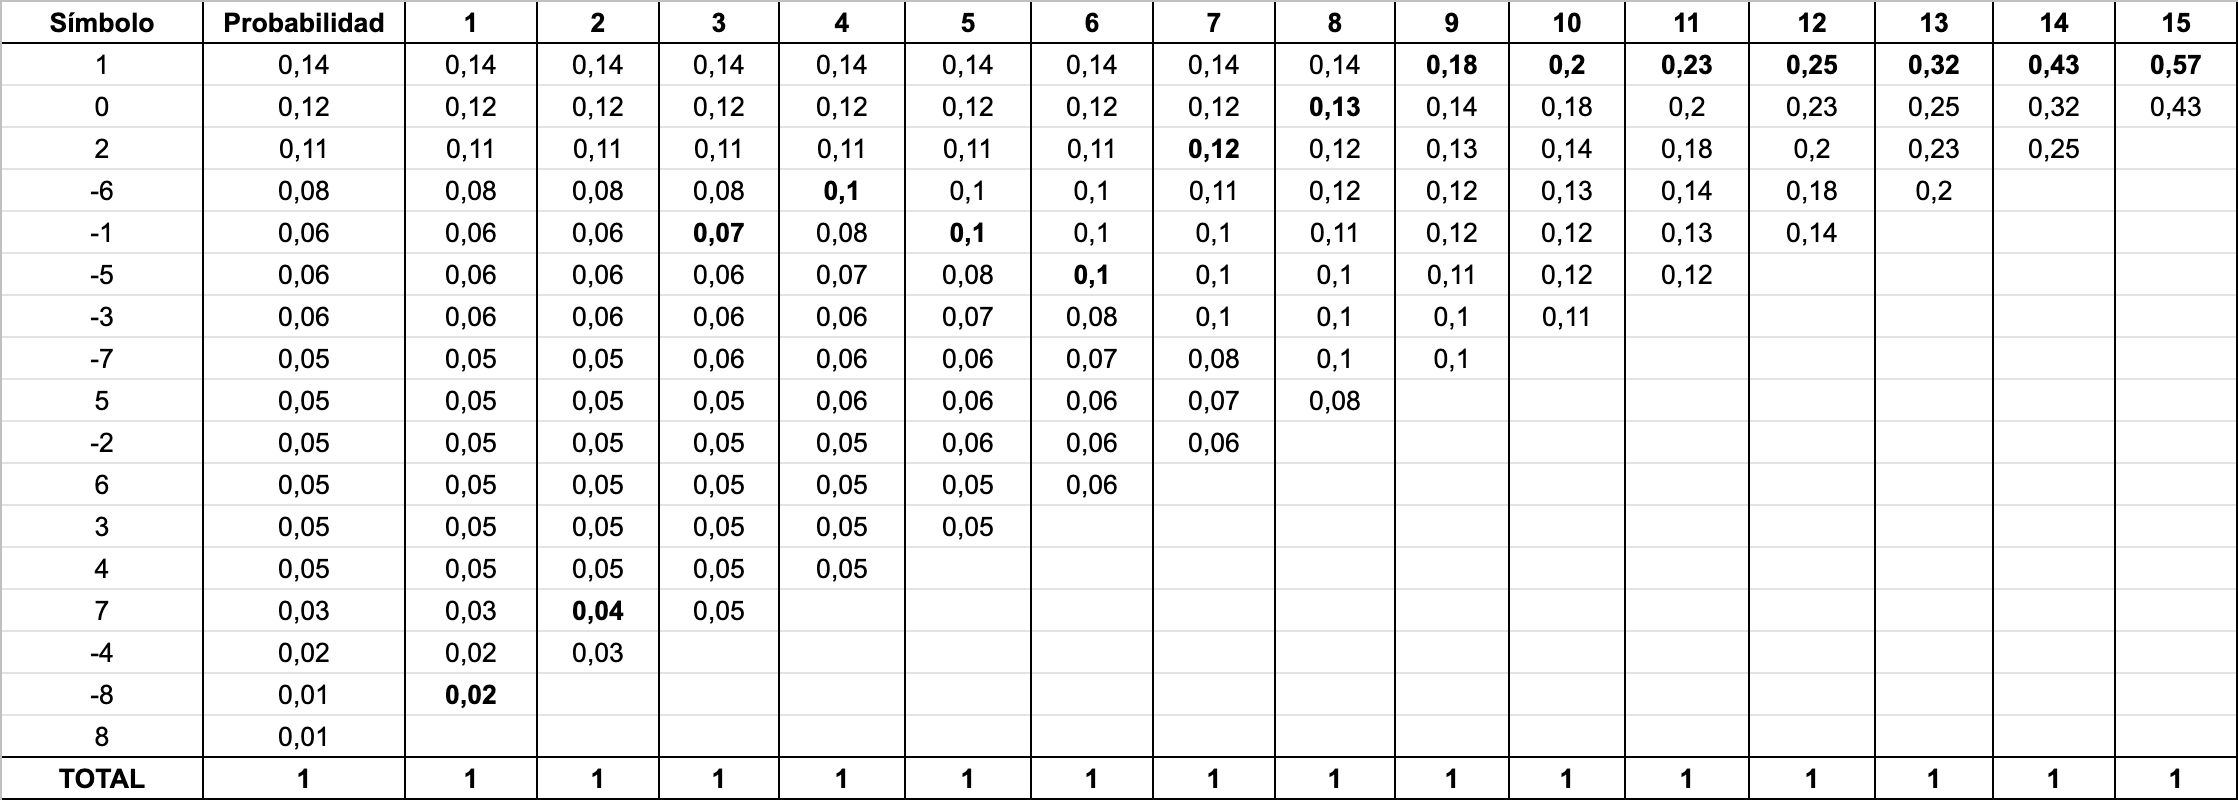

In [23]:
Image(filename='Dimg_Tabla_Huffman.png') 

A partir de lo anterior, generamos el árbol resultando en el siguiente:

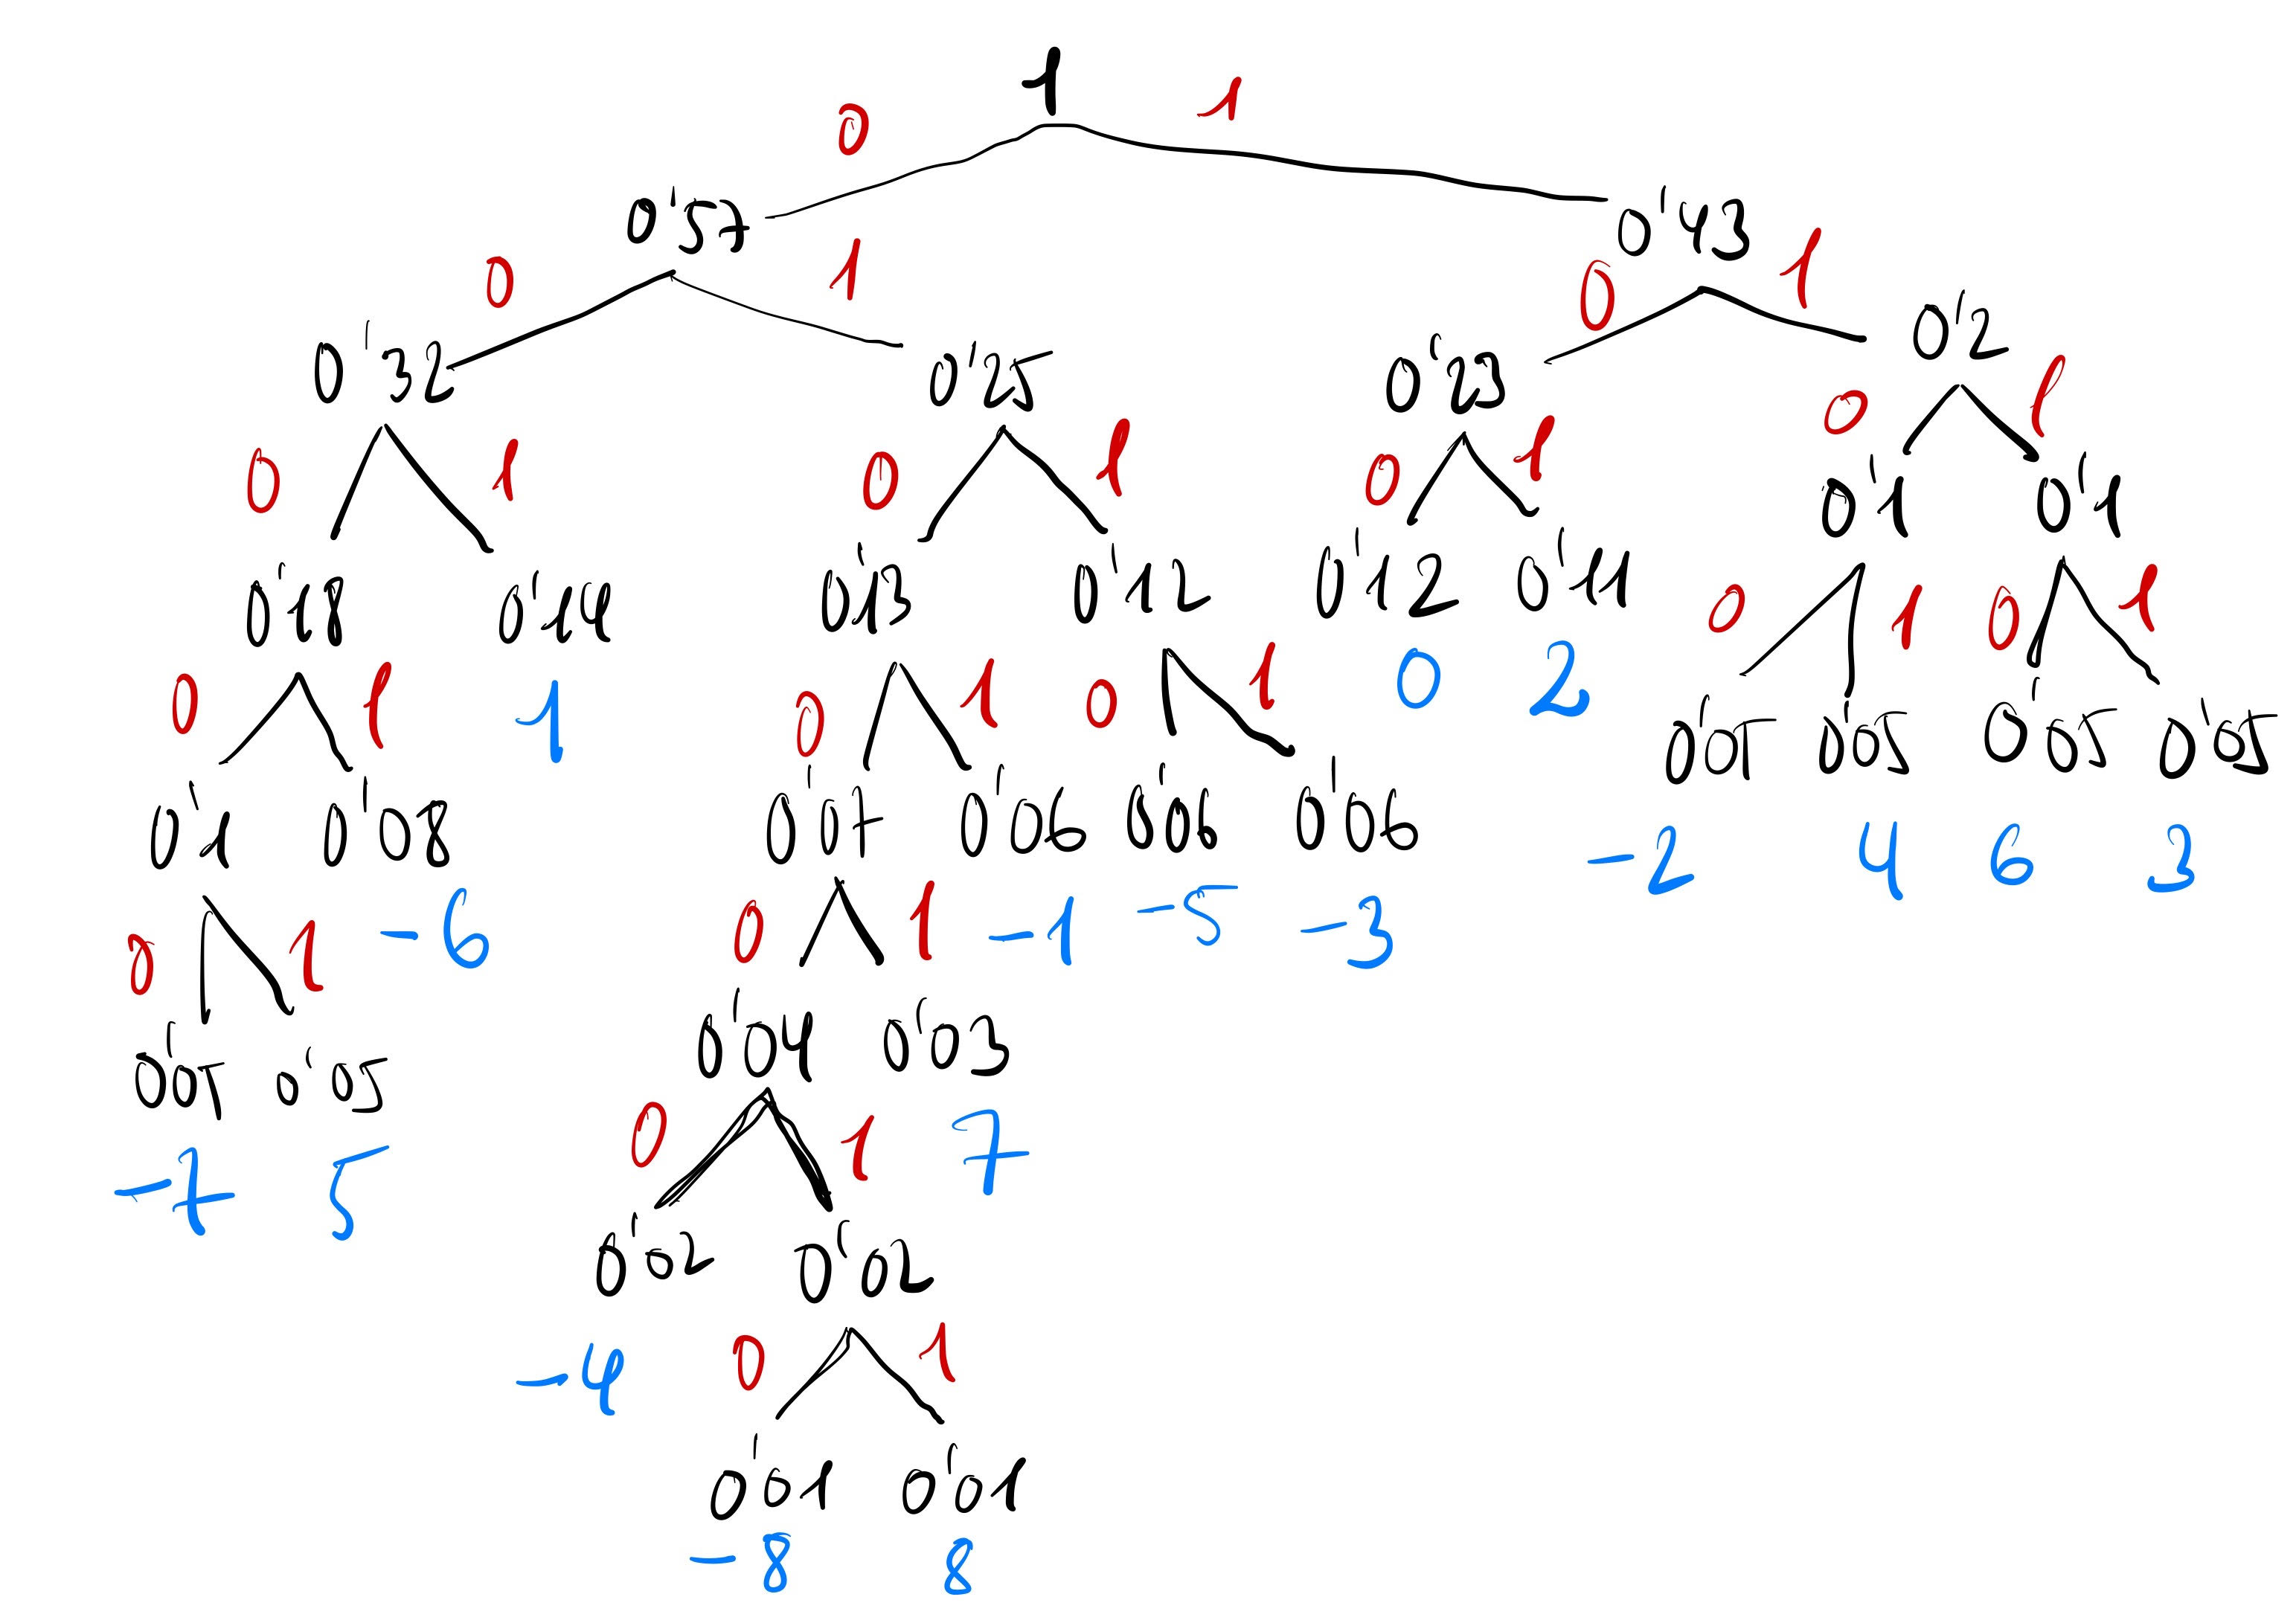

In [24]:
Image(filename='Dimg_Arbol_Huffman.jpeg')

Finalmente, tenemos los códigos de Huffman para cada símbolo (de longitud variable, inversamente proporcional a la probabilidad) en el caso de la imagen con las diferencias `dimg`.

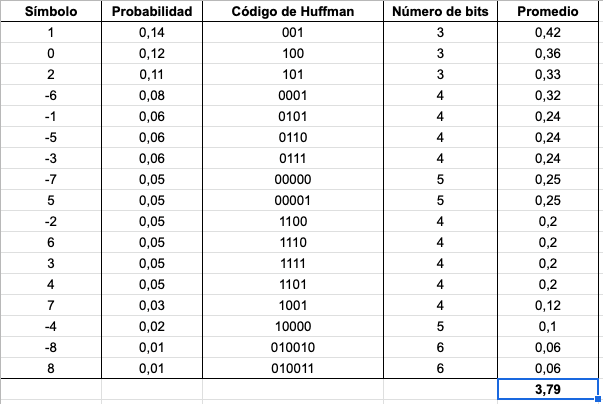

In [25]:
Image(filename='Dimg_Resultado_Huffman.png') 

Finalmente, vamos a calcular el promedio de bits antes y después de aplicar la codificación de Huffman para ambas imágenes y, a continuación, vamos a calcular los radios de compresión de Huffman para cada imagen.

Respecto de la imagen original, el promedio de bits ha pasado de `4` a `3.24` y, en la imagen con las diferencias, se ha pasado de `5` a `3.79` bits.

In [26]:
print("El radio de compresión para la imagen original es:", 4/3.24)
print("El radio de compresión para la imagen con las diferencias es:", 5/3.79)

El radio de compresión para la imagen original es: 1.2345679012345678
El radio de compresión para la imagen con las diferencias es: 1.3192612137203166


Tenemos, por tanto, un radio de compresión más alto en la imagen con las diferenicas que en el original. El método de codificación de Huffman es más beneficioso en el caso de `dimg`. Es un método que tiene en cuenta las probabilidades de los símbolos para usar códigos más reducidos en ellos, esto es, en promedio, reduce el número de bits necesarios para codificar la imagen.

Esto ocurre porque en al generar la imagen a partir de las diferencias, hay ciertos símbolos para los que hay más combinaciones de restas que permiten obtener el mismo símbolo, lo que se traduce en que es más probable ver ciertos símbolos que otros. por Ejemplo, -9 sólo se obtiene mediante 0 - 9, sin embargo, 0 se obtiene con bastantes más combinaciones (algunas son, por ilustrar, 5-5, 4-4, etc.). 

## Ejercicio 4. Histograma

_**Nota**: He nombrado a este ejercicio como ejercicio 4, al igual que está en el PDF con el enunciado. Entiendo que se trata de una herrata porque no existe ejercicio 3 en el enunciado. El motivo es mantener la misma notación que en el enunciado._

Vamos a utilizar la siguiente imagen, debido a que tenemos un amplio rango de grises.

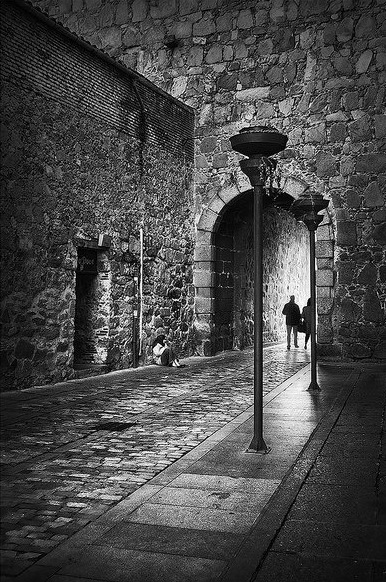

In [27]:
Image(filename='grises_ej4.jpeg') 

Vamos a cargar la imagen y a mostrarla también usando matplotlib.

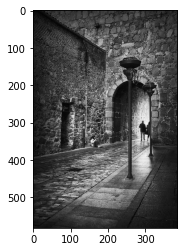

In [28]:
img = cv.imread('grises_ej4.jpeg',0)
plt.imshow(img, cmap='gray')

Para asegurarnos, vamos a visualizar su histograma.

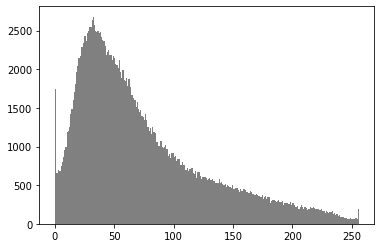

In [29]:
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256], color='gray'); plt.show()

Hemos calculado el histograma utilizando OpenCV, aunque también cabe la posibilidad de hacerlo directamente con Numpy. Vemos como los grises están entre 0 y 255, aunque la mayor parte de los píxeles están entre 0 y 100.

Ahora, vamos a aplicar una transformación lineal que convierta la imagen en otra con poco contraste y muy oscura. Al tratarse de una transformación lineal, tenemos que queremos lo siguiente: `p' = a * p + b`, donde `p'` es el nuevo pixel obtenido de la transformación lineal sobre el pixel original `p`, además `a` y `b` son el control del contraste y del brillo respectivamente.

De una forma manual, podemos hacer una transformación para aplicar un valor `a=0.3` (o `alpha=0.3`) para cambiar el contraste y dejar todos los grises de los píxeles por debajo de un valor 80 aproximadamente:

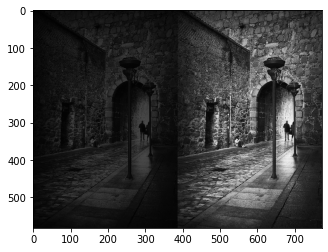

In [30]:
darked_img = np.zeros(img.shape, np.uint8)

alpha = 0.3 # Contrast control
beta = 1    # Brightness control

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        darked_img[i,j] = np.clip(alpha * img[i,j] + beta, 0, 255)

darked_concat_img = cv.hconcat([darked_img,img])
plt.imshow(darked_concat_img, cmap='gray')

Vemos a la izquierda la imagen oscurecida y, a la derecha, la imagen original. Comentar también que a continuación se va a utilizar siempre `hconcat` para poder comparar, y siempre a la izquierda la nueva imagen y a la derecha la imagen con la que se quiere comparar.

Si visualizamos el histograma, podemos ver lo explicabamos previamente.

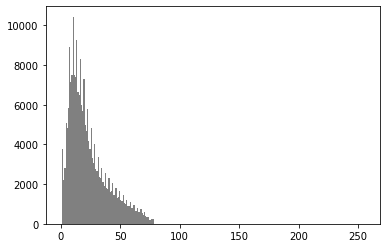

In [31]:
hist = cv.calcHist([darked_img],[0],None,[256],[0,256])
plt.hist(darked_img.ravel(),256,[0,256], color='gray'); plt.show()

Esto mismo podemos hacerlo utilizando una función que nos provee OpenCv llamada `convertScaleAbs`:

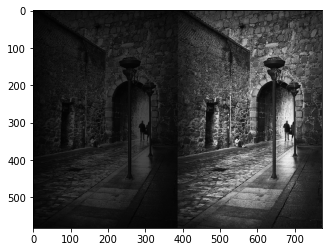

In [32]:
new_image = cv.convertScaleAbs(img, alpha=0.3, beta=1)

darked_concat_img = cv.hconcat([new_image,img])
plt.imshow(darked_concat_img, cmap='gray')
#plt.imshow(new_image, cmap='gray')

Y mostramos de nuevo el histograma:

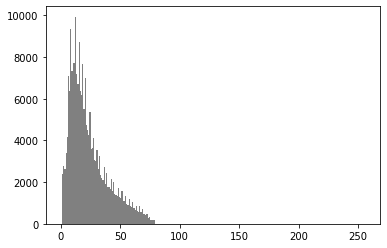

In [33]:
hist = cv.calcHist([new_image],[0],None,[256],[0,256])
plt.hist(new_image.ravel(),256,[0,256], color='gray'); plt.show()

Como vemos, hemos obtenido el mismo resultado. Con la transformación lineal aplicada, hemos mantenido la forma del histograma a la vez que pasamos a niveles de gris más oscuros.

Ahora, vamos a realizar una transformación para conseguir poco contraste y una imagen muy clara (a partir de la anterior), utilizando `convertScaleAbs`:

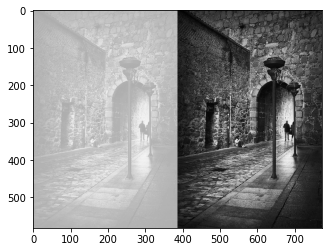

In [34]:
brighted_image = cv.convertScaleAbs(new_image, alpha=1, beta=170)

brighted_concat_img = cv.hconcat([brighted_image,img])
plt.imshow(brighted_concat_img, cmap='gray')

Hemos aplicado una transformación con `a=1` o `alpha=1` para no alterar el contraste de la imagen anterior. Además, hemos aplicado una transformación con `b=170` o `beta=170`, por lo que desplazamos los píxeles a valores de grises en un intervalo más alto, en este caso entre 170 y 255.

Esto se puede ver claramente mostrando el histograma.

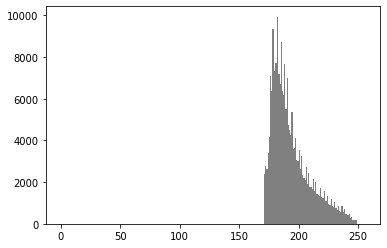

In [35]:
hist = cv.calcHist([brighted_image],[0],None,[256],[0,256])
plt.hist(brighted_image.ravel(),256,[0,256], color='gray'); plt.show()

Hemos evitado con la elección de estos parámetros aplha y beta, además, la saturación que podría producir el tener valores fuera de rango, es decir, todos los valores por debajo de 0 o por encima de 255, serían convertidos a 0 o 255 respectivamente.

Finalmente, vemos como hemos mantenido la misma forma del histograma, es decir, el mísmo número de píxeles en el mismo valor de grises tras aplicar la transformación.

## Ejercicio 5. Transformaciones no lineales

Vamos a partir de la imagen anterior, que hemos llamado `brighted_image`, y buscamos realizar transformaciones de intensidades no lineales, ya sean de tipo logarítmica, exponenciales, potencias-raíz, para mejorar el contraste de la imagen obtenida.

Para ello, vamos a mostrar, de nuevo, el histograma de `brighted_image`:

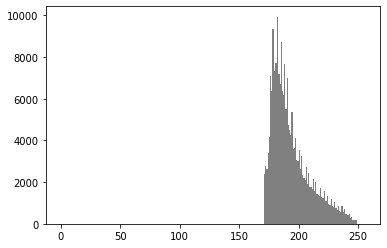

In [36]:
hist = cv.calcHist([brighted_image],[0],None,[256],[0,256])
plt.hist(brighted_image.ravel(),256,[0,256], color='gray'); plt.show()

Estamos ante una imagen en escala de grises, por lo que tenemos en cada pixel un valor entre 0 y 255, según el nivel de gris, como podemos ver a continuación:

In [37]:
brighted_image

array([[176, 173, 174, ..., 188, 186, 188],
       [171, 174, 174, ..., 185, 190, 184],
       [171, 179, 173, ..., 189, 182, 176],
       ...,
       [176, 179, 178, ..., 175, 175, 175],
       [176, 178, 178, ..., 175, 176, 176],
       [176, 178, 176, ..., 176, 176, 176]], dtype=uint8)

Del ejercicio anterior, tenemos un histograma en el que todos los grises usados están, aproximadamente, entre los niveles de grises 170 y 255, es decir, tenemos poco contraste (usamos muy pocos niveles de grises distintos) y además, muy claros por el rango en el que están. En esta imagen, tenemos la mayor parte de los píxeles en un rango muy específico, ya que vemos "una montaña" definida al principio del histograma.

Anteriormente, hemos visto como con una transformación lineal tenemos control sobre el contraste (parámetro `alpha`). En este caso, se nos pide hacerlo con transformaciones no lineales.

Pero antes, vamos a hacer un ejercicio de mejora del contraste sin usar transformaciones. Como se explica [aquí](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html) podemos realizar una equialización para mejorar el contraste, por decirlo de algún modo, permitiendo diferenciar los píxeles unos de otros y, para ello, hay intentar que estén (en nuestro caso) en un nivel de gris bastante separado de los de alrededor, para percibir mejor los detalles.

Vamos a realizar una equialización del histograma para ilustrar esto.

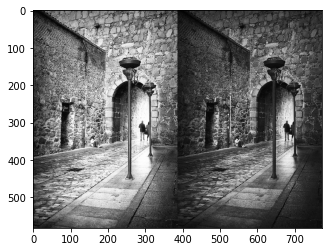

In [38]:
img_equalization = cv.equalizeHist(brighted_image)

equalized_concat_img = cv.hconcat([img_equalization,img])
plt.imshow(equalized_concat_img, cmap='gray')
#plt.imshow(img_equalization, cmap='gray')

En la imagen ya se aprecia una mejora del contraste de la imagen, pero se refleja mejor viendo el histograma.

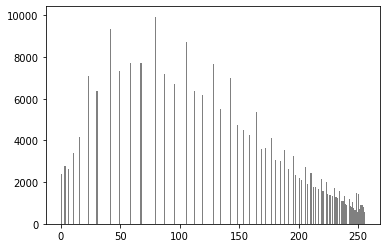

In [39]:
hist = cv.calcHist([img_equalization],[0],None,[256],[0,256])
plt.hist(img_equalization.ravel(),256,[0,256], color='gray'); plt.show()

Vemos que los píxeles toman valores de gris en unos grupos concretos, y con suficiente diferencia del grupo más cercano. En ello, afecta la cantidad de píxeles, a más cantidad de píxeles más espacio hay entre los grupos.

Volviendo a lo que se nos pide, vamos a utilizar las transformaciones no lineales que hemos visto en teoría donde se puede obtener una mejora del contraste y vamos a aplicarlos.

En este caso, vamos a realizar una correción gamma ya que se trata de una operación no lineal. Esta corrección se usa para la mejora de la luminosidad mediante la corrección de contraste. Esto es, se van a usar más grises.

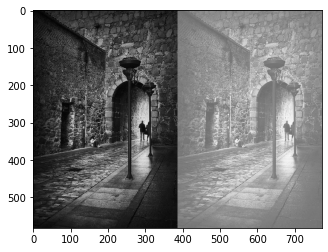

In [40]:
gamma = 2.0
    
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(brighted_image, lookUpTable)

img_gamma_corrected = cv.hconcat([res,brighted_image])
plt.imshow(img_gamma_corrected, cmap='gray')

Vamos a ver el histograma.

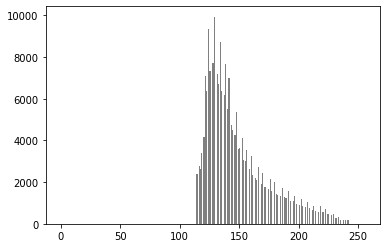

In [41]:
hist = cv.calcHist([res],[0],None,[256],[0,256])
plt.hist(res.ravel(),256,[0,256], color='gray'); plt.show()

El histograma muestra como se usan más grises (desde el nivel de gris aproximado de 120 hasta 240) y un efecto similar al que veíamos en la ecualización, es decir, crear grupos de grises y mantener una separación entre ellos. Por lo que hay cierta ecualización en esta imagen.

La función utilizada es `c * r**n`, por lo que con `n < 1` lo que vamos a conseguir es que los niveles de gris bajen (se aclara) y con `n > 1` conseguimos que los niveles de gris suban  (se oscurece). Nosotros partimos de una imagen muy clara, por lo que nos interesa un `gamma > 1`.

Comentar que `lookUpTable` se usa para mejorar el rendimiento de la computación, ya que los valores de los píxeles sólo toma 256 valores.

## Referencias

Las referencias utilizadas para desarrollar este cuadernos son las siguientes:

* [(Ejercicio 1) Changing Colorspaces](https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html)
* [(Ejercicio 1) OpenCV/Python: read specific frame using VideoCapture](https://stackoverflow.com/a/33667919/4436650)
* [(Ejercicio 1) How to Display an OpenCV image in Python with Matplotlib?](https://www.geeksforgeeks.org/how-to-display-an-opencv-image-in-python-with-matplotlib/)
* [(Ejercicio 1) Display OpenCV Image in Jupyter Notebook](https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88) 
* [(Ejercicio 2) Comprimiendo datos - el algoritmo de Huffman en Python](https://bitybyte.github.io/Huffman-coding/)
* [(Ejercicio 2) How to sort Counter by value? - python](https://stackoverflow.com/a/20950667/4436650)
* [(Ejercicio 4) Histograms - 1 : Find, Plot, Analyze !!!](https://docs.opencv.org/4.5.2/d1/db7/tutorial_py_histogram_begins.html)
* [(Ejercicio 4) Changing the contrast and brightness of an image!](https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html)
* [(Ejercicio 5) Histogram Equalization](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)
* [(Ejercicio 5) Log transformation of an image using Python and OpenCV](https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/)
* [(Ejercicio 5) Changing the contrast and brightness of an image! - gamma correction](https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html)